En este notebook muestro cómo modelar datos mediante regresion lineal (multivariada), interpretando los resultados y discutiendo las limitaciones. Invento un dataset para trabajar en este notebook. El dataset va a constar de una variable dependiente (cantidad de unidades vendidas) y las siguientes dos variables independientes: precio por unidad y gasto publicitario.

In [ ]:
import numpy as np

precio = np.array([24, 30, 43 , 101, 34, 94, 10, 15, 12, 44, 202, 156, 90])
gasto = np.array([2000, 4801, 210, 10000, 6000, 503, 491, 4000, 9200, 1000, 1500, 1800, 3000])

precio.shape

(13,)

Ahora, voy a construir la variable dependiente, "ventas".

Primero, voy a considerar un coeficiente negativo por "precio" sumado a un término de error:


In [ ]:
X = precio.reshape(-1, 1) # esto es necesario para transformar el vector en matriz

print(X.shape)

beta, beta0 = -0.3, 100

mu, sigma = 0, 10   # medio y desvío estándar del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

y = (np.dot(np.transpose(X),beta)+ beta0 + epsilon).round()
y = np.transpose(y)

print(X)
print(y)


(13, 1)
[[ 24]
 [ 30]
 [ 43]
 [101]
 [ 34]
 [ 94]
 [ 10]
 [ 15]
 [ 12]
 [ 44]
 [202]
 [156]
 [ 90]]
[[ 83.]
 [ 86.]
 [ 64.]
 [ 73.]
 [ 81.]
 [ 77.]
 [ 92.]
 [105.]
 [104.]
 [101.]
 [ 32.]
 [ 47.]
 [ 59.]]


Puedo hacer el plot de una variable contra la otra y ver que sugiere que existe una relación lineal entre ambas:

Text(0.5, 0, 'Precio por unidad')

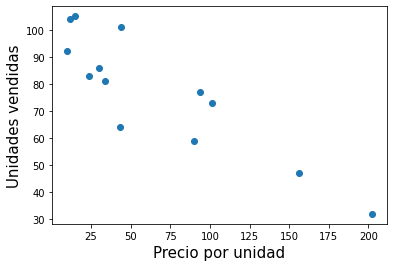

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

Antes, podemos ilustrar el problema a resolver de la siguiente manera. Definamos una función que encuentra el error cuadrático medio dados parámetros beta0, beta1 (los parametros de la regresion lineal).

In [ ]:
def error_cuadratico_medio(X,y,beta):
  error=0.0
  for n,val in enumerate(y):
    y_est = beta[0] + beta[1]*X[n]
    error = error + (y_est - y[n])**2
  return error/len(y)


Ahora puedo adivinar valores de beta y obtener el error asociado.

In [ ]:
print(error_cuadratico_medio(X,y,[60,0.4]))
print(error_cuadratico_medio(X,y,[60,-0.4]))
print(error_cuadratico_medio(X,y,[-60,0.4]))
print(error_cuadratico_medio(X,y,[100,-0.3])) # este es el valor real de los parametros

[1927.72923077]
[2011.66769231]
[14149.26769231]
[110.29769231]


Visualicemos la curva tridimensional que tengo que minimizar para encontrar los parametros: la curva del error cuadratico medio vs. beta0 y beta1.

Text(0.5, 0, 'beta1')

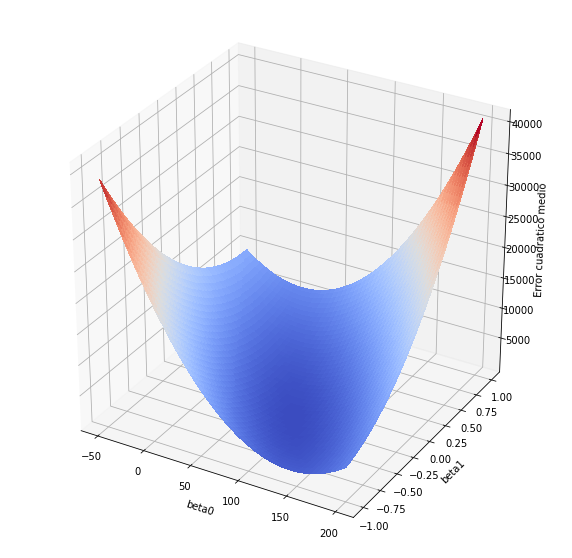

In [ ]:
beta0 = np.arange(-50,200,0.25)
beta = np.arange(-1,1,0.01)
X0, Y0 = np.meshgrid(beta0, beta)

Z = error_cuadratico_medio(X,y,[X0,Y0])

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlabel('Error cuadratico medio')
ax.set_xlabel('beta0')
ax.set_ylabel('beta1')


Ahora ajusto un modelo de regresión lineal a los datos usando sci-kit learn.

El proceso de ajustar modelos con scikit-learn es siempre el mismo:

1.   Creamos un objeto que representa el modelo, pasándole los parámetros correspondientes.
2.   Entrenamos el modelo con los datos.
3.   Usamos el modelo para predecir el valor de nuevos datos.



In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_]  # los parametros estimados
print(estimated)

R2 = reg.score(X,y) # R2
print(R2)


[array([98.75584041]), array([[-0.32728178]])]
0.7820015565371614


Voy a graficar la recta teórica junto con la que mejor ajusta los datos.

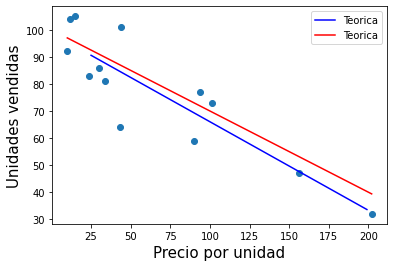

In [ ]:
plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

x_var = np.arange( X.min(), X.max(), 0.001)
y_var = estimated[0] + x_var*estimated[1]
y_var_est = 100 + x_var*(-0.3)

#plt.plot(x_var,np.transpose(y_var),label="Estimado", color='b')
x = np.arange(25,200,1)
ypred = reg.predict(x.reshape(-1, 1))
plt.plot(x,ypred,label="Teorica", color='b')
plt.plot(x_var,np.transpose(y_var_est),label="Teorica", color='r')

plt.legend(loc='upper right')

Puedo graficar fácilmente los intervalos de confianza de 95% usando seaborn.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


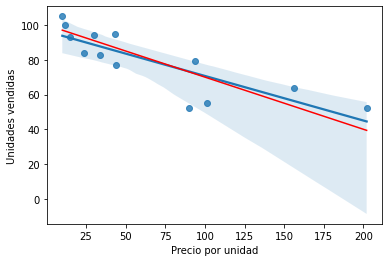

In [ ]:
import seaborn as sns

ax = sns.regplot(X, y, ci=99)
ax.set_xlabel('Precio por unidad')
ax.set_ylabel('Unidades vendidas')

plt.plot(x_var,np.transpose(y_var_est),label="Teorica", color='r')




Supongamos que agrego más datos y conozco el precio por unidad. ¿Cuál es la predicción sobre la cantidad de unidades vendidas?

Text(0.5, 0, 'Precio por unidad')

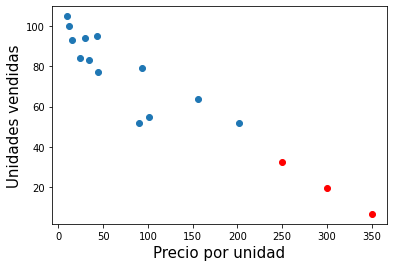

In [ ]:
precios_nuevo = np.array([250, 300, 350])
X_nuevo = precios_nuevo.reshape(-1, 1)

y_nuevo = reg.predict(X_nuevo)  # hago la prediccion para estos nuevos valores

plt.scatter(X,y)
plt.scatter(X_nuevo,y_nuevo, color='r')

plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')


Veamos por último el caso de la regresión usando dos variables independientes: el precio por unidad y el gasto de publicidad.

Primero creo una matriz que contenga ambas variables y luego simulo los datos multiplicando cada fila por su coeficiente, y agregando ruido normalmente distribuido.

In [ ]:
X = np.column_stack((precio,gasto))  # variables independientes
beta = np.array([-0.3,0.1]) # parametros
beta0 = 20  #

mu, sigma = 0, 10   # medio y desvío estándar del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

y = (np.dot(X,beta)+ beta0 + epsilon).round()

Ahora que ya simulé los datos, voy crear y estimar el modelo de regresión.

In [ ]:
reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_[0], reg.coef_[1]]

print(estimated)

R2 = reg.score(X,y) # R2
print(R2)


[22.824563174753962, -0.28625472863144164, 0.09958495611073095]
0.999228044994991
